# 8장 머신러닝 응용

## 8.4 다양한 예측 사례 

In [4]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

In [5]:
df= pd.read_csv('../data/fashion-mnist_train.csv')
df = df.sample(frac=0.2, random_state=11)

df_test = pd.read_csv('../data/fashion-mnist_test.csv')
df_test.sample(frac=0.2, random_state=11)

df         # 훈련 학습용 자료로 예측 모형 생성
df_test    # 생성된 모델로 검증

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3104,2,0,0,0,0,0,0,0,0,0,...,108,60,0,0,0,0,0,0,0,0
6353,6,0,0,0,0,3,0,36,44,0,...,120,99,68,69,16,0,0,0,0,0
8689,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5857,5,0,0,0,0,0,0,0,0,0,...,124,0,0,0,0,0,0,0,0,0
6011,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3837,2,0,0,0,0,0,0,3,0,0,...,0,0,0,0,91,132,65,0,0,0
3340,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3519,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
17110,6,0,0,0,0,0,0,0,0,1,...,69,17,0,0,0,0,0,0,0,0
52027,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54904,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11983,6,0,0,0,0,0,0,0,0,30,...,132,138,144,120,0,0,0,0,0,0
58999,0,0,0,0,0,0,0,0,0,0,...,81,41,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54542,2,0,0,0,0,0,0,0,1,0,...,0,0,0,64,199,175,53,0,0,0
23278,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18374,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3923,9,0,0,0,0,0,0,0,0,0,...,60,0,82,0,59,0,0,25,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_test.label.value_counts(normalize=True)

7    0.1
6    0.1
5    0.1
4    0.1
3    0.1
2    0.1
9    0.1
1    0.1
8    0.1
0    0.1
Name: label, dtype: float64

In [7]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


In [8]:
X = df.drop(['label'], axis=1)
X = X/255
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                    random_state = 11)

In [10]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=5)
param_grid = {}
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
y_predict = gs.fit(X_train, y_train).predict(X_test)
y_probas = gs.fit(X_train, y_train).predict_proba(X_test)

KeyboardInterrupt: 

In [ ]:
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)
skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize =True)

In [ ]:
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [ ]:
X_true = df_test.drop(['label'], axis=1)
X_true = X_true/255
y_true = df_test['label']
X_true.shape, y_true.shape

In [ ]:
y_predict_val = gs.predict(X_true)
accuracy_score(y_true, y_predict_val)
print(classification_report(y_true, y_predict_val))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize =True)

In [ ]:
pd.DataFrame(gs.predict_proba(X_true))
pd.DataFrame(y_predict_val).T

In [ ]:
pd.DataFrame(X)

In [30]:
from catboost import CatBoostClassifier
seed= 11
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=seed)

In [38]:
estimator = CatBoostClassifier(verbose=False, loss_function='MultiClass')
estimator.fit(X_train, y_train)

KeyboardInterrupt: 

In [31]:
params = {'loss_function':'Logloss', 'eval_metric':'AUC', 
          'verbose': 200, 'random_seed': seed}
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/libs/target/data_providers.cpp:525: You should specify target border parameter for target binarization.

## 2. 사이킷런 데이터셋

In [16]:
from sklearn.datasets import load_iris
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
pd.DataFrame(df.data).head()
pd.DataFrame(df.target).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,0
0,0
1,0
2,0
3,0
4,0


In [18]:
X, y = load_iris(return_X_y=True)
X[0:10]
y[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

0.9666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



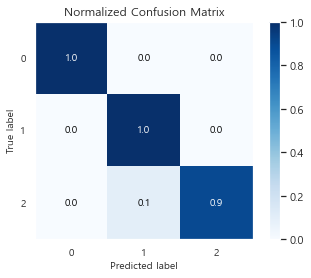

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier()
y_predict = model.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))
skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize =True)

## 3. 다중계층 퍼셉트론 모형

In [20]:
import os
os.chdir('d:/Python_data/script/')
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/df_04.pkl')['구매']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [21]:
from sklearn.neural_network import MLPClassifier
np.random.seed(1357)

In [22]:
clf = MLPClassifier(max_iter=300).fit(X_train, y_train)
y_probas = clf.predict_proba(X_test)
y_predict = clf.predict(X_test)
clf.score(X_test, y_test)

0.6575

In [23]:
kf = KFold(n_splits=5)
scaler_tuple =('scaler',StandardScaler())
model_tuple = ('mlp',  MLPClassifier())
pipe = Pipeline([model_tuple])

params = {'mlp__solver': ['lbfgs', 'sgd', 'adam'], 
          'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
          'mlp__max_iter': [1000,1300,1500,1700,1900,2100 ], 
          'mlp__batch_size' : [200, 300, 400, 500, 600],
          'mlp__alpha': 10.0 ** -np.arange(1, 10), 
          'mlp__hidden_layer_sizes':np.arange(10, 15), 
          'mlp__random_state':[1, 3, 5, 7, 9, 11,13, 15]}

grid = RandomizedSearchCV(pipe, params, cv=kf, scoring='recall_macro', 
                          n_iter = 20, verbose =True)
%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


Wall time: 1min 18s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('mlp', MLPClassifier())]),
                   n_iter=20,
                   param_distributions={'mlp__activation': ['identity',
                                                            'logistic', 'tanh',
                                                            'relu'],
                                        'mlp__alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                                        'mlp__batch_size': [200, 300, 400, 500,
                                                            600],
                                        'mlp__hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                                        'mlp__max_iter': [1000, 1300, 1500,
                                                          1700, 1900, 2100],
                                        'mlp__random_state': [1,

In [24]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.610
test score: 0.595
optimal parameter: {'mlp__solver': 'adam', 'mlp__random_state': 3, 'mlp__max_iter': 1500, 'mlp__hidden_layer_sizes': 12, 'mlp__batch_size': 600, 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}


In [25]:
y_predict = grid.predict(X_test)
accuracy_score(y_test, y_predict)

0.675

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       522
           1       0.55      0.33      0.41       278

    accuracy                           0.68       800
   macro avg       0.63      0.59      0.59       800
weighted avg       0.65      0.68      0.65       800



In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
y_probas = grid.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probas[:,1])
ap = average_precision_score(y_test, y_probas[:,1])
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 66.31
AP Mean : 53.46


## 4. Target mean

In [38]:
titanic = sns.load_dataset('titanic')
train = titanic.drop(['age', 'parch', 'embarked', 'class', 'who', 'adult_male', 
                      'deck', 'embark_town', 'alive', 'alone'], axis = 1)
X = train.drop('survived', axis = 1) 
y = train.survived

In [39]:
df = pd.merge(X, y, left_index=True, right_index=True)
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   sibsp     891 non-null    int64  
 3   fare      891 non-null    float64
 4   survived  891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


pclass        3
sex           2
sibsp         7
fare        248
survived      2
dtype: int64

In [40]:
df['sex'] = df['sex'].astype('category')
df.groupby(['pclass'])['survived'].mean().to_dict()
target_mean = df.groupby(['pclass'])['survived'].mean().to_dict()
df['pclass'] = df['pclass'].map(target_mean)
df

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

,pclass,sex,sibsp,fare,survived
0,0.242363,male,1,7.2500,0
1,0.629630,female,1,71.2833,1
2,0.242363,female,0,7.9250,1
3,0.629630,female,1,53.1000,1
4,0.242363,male,0,8.0500,0
...,...,...,...,...,...
886,0.472826,male,0,13.0000,0
887,0.629630,female,0,30.0000,1
888,0.242363,female,1,23.4500,0
889,0.629630,male,0,30.0000,1


In [41]:
from sklearn.ensemble import RandomForestClassifier
cat = df.select_dtypes(include=['category']).columns
X = pd.get_dummies(df.drop(['survived'], axis=1), prefix= cat)
y = df['survived']
kf = KFold(n_splits=5)
clf = RandomForestClassifier(n_estimators = 100, random_state = 11)
cross_val_score(clf, X, y, cv=kf)
cross_val_score(clf, X, y, cv=kf).mean()

array([0.75418994, 0.79213483, 0.85393258, 0.82022472, 0.80337079])

0.8047705730964786

In [42]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index]    
    y_predict = clf.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
print('모델 평균 정확도', sum(accuracy_list)/len(accuracy_list))

[0.7541899441340782,
 0.7921348314606742,
 0.8539325842696629,
 0.8202247191011236,
 0.8033707865168539]

모델 평균 정확도 0.8047705730964786


## pipeline with mean_target

In [43]:
titanic = sns.load_dataset('titanic')
train = titanic.drop(['age', 'parch', 'embarked', 'class', 'who', 'adult_male', 
                      'deck', 'embark_town', 'alive', 'alone'], axis = 1)
X = train.drop('survived', axis = 1); y = train.survived
df = pd.merge(X, y, left_index=True, right_index=True)
df['sex'] = df['sex'].astype('category')
cat = df.select_dtypes(include=['category']).columns
df = pd.get_dummies(df, prefix= cat)
X = df.drop(['survived'], axis=1)
y = df['survived']

In [44]:
def mean_encoding(X, y, column, target):
    df = pd.merge(X, y, left_index=True, right_index=True)
    means_list = df.groupby(by=column)[target].mean()    
    return df[column].map(means_list)

In [45]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index] 
    X_train['pclass'] = mean_encoding(X_train, y_train, 'pclass', 'survived')
    X_test['pclass'] = mean_encoding(X_test, y_test, 'pclass', 'survived')    
    y_predict = clf.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
print('모델 평균 정확도', sum(accuracy_list)/len(accuracy_list))

[0.7821229050279329,
 0.7921348314606742,
 0.8426966292134831,
 0.8202247191011236,
 0.797752808988764]

모델 평균 정확도 0.8069863787583955


## 5. BaseEstimator, TransformerMixin 사용자정의 함수와 파이프라인
### BaseExtimator, TranformarMxin, Class, inheritance
#### MeanCategoricalEncoder
https://feature-engine.readthedocs.io/en/latest/encoders/MeanCategoricalEncoder.html
#### put-customized-functions-in-sklearn-pipeline
https://stackoverflow.com/questions/31259891/put-customized-functions-in-sklearn-pipeline

# Get the data

In [46]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
df = fetch_california_housing()
df.feature_names.extend(df.target_names)
df = pd.DataFrame(np.c_[df.data, df.target], columns = df.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

FileNotFoundError: [Errno 2] File ../data/housing.csv does not exist: '../data/housing.csv'

In [50]:
np.random.seed(42)

# Discover and visualize the data to gain insights

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


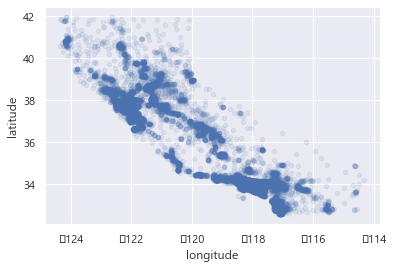

In [51]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

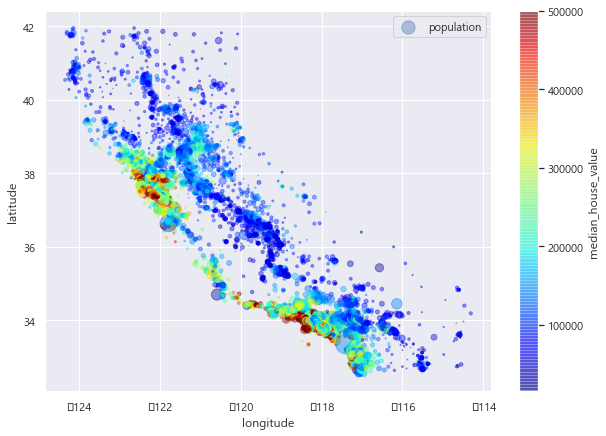

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

0.6880752079585484

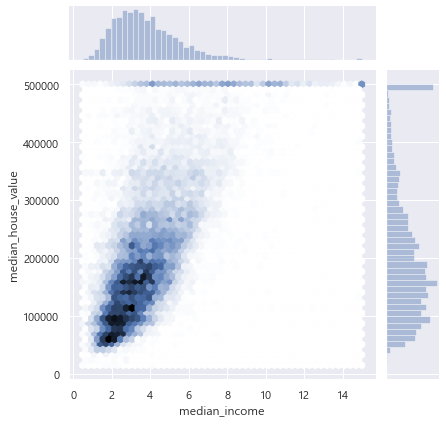

In [53]:
sns.jointplot("median_income", "median_house_value", data=housing, kind="hex")
housing.median_income.corr(housing.median_house_value)

# Prepare the data for Machine Learning algorithms

In [54]:
X = housing.drop(['longitude', 'latitude', 'median_house_value'], axis=1)
y = housing['median_house_value']
X.head()
y.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 1, 2, 3, 4

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder()
X_extra_attribs = attr_adder.transform(X.values)
X_extra_attribs = pd.DataFrame(
    X_extra_attribs,
    columns=list(X.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

X_extra_attribs.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,41,880,129,322,126,8.3252,NEAR BAY,6.98413,2.55556
1,21,7099,1106,2401,1138,8.3014,NEAR BAY,6.23814,2.10984
2,52,1467,190,496,177,7.2574,NEAR BAY,8.28814,2.80226
3,52,1274,235,558,219,5.6431,NEAR BAY,5.81735,2.54795
4,52,1627,280,565,259,3.8462,NEAR BAY,6.28185,2.18147


### Now let's build a pipeline for preprocessing the numerical attributes:

In [56]:
from sklearn.impute import SimpleImputer
X_num = X.drop(['ocean_proximity'], axis=1)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])  
                 
X_num_tr = num_pipeline.fit_transform(X_num)
X_num_tr = pd.DataFrame(
    X_num_tr,
    columns=list(X_num.columns)+["rooms_per_household",
                                 "population_per_household"],
    index=housing.index)
X_num_tr.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-0.049597
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.092512
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-0.025843
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.050329
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.085616


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)
X_prepared

array([[ 0.98214266, -0.8048191 , -0.97247648, ...,  0.        ,
         1.        ,  0.        ],
       [-0.60701891,  2.0458901 ,  1.35714343, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.85618152, -0.53574589, -0.82702426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.92485123, -0.17499526, -0.12360781, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84539315, -0.35559977, -0.30482697, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00430931,  0.06840827,  0.18875678, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
full_pipeline
full_pipeline.named_transformers_
full_pipeline.named_transformers_["cat"].categories_[0]

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('attribs_adder', CombinedAttributesAdder()),
                 ('std_scaler', StandardScaler())]), 'cat': OneHotEncoder()}

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                                 scoring='neg_mean_squared_error')
grid_search.fit(X_prepared, y)
grid_search.best_estimator_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

RandomForestRegressor(max_features=8, n_estimators=30)

In [60]:
grid_search.best_params_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'n_estimators': 30, 'max_features': 8}

78502.87223731854 {'n_estimators': 3, 'max_features': 2}
72199.59033414512 {'n_estimators': 10, 'max_features': 2}
67574.18046384654 {'n_estimators': 30, 'max_features': 6}
67989.15323935637 {'n_estimators': 30, 'max_features': 4}
75868.54758845584 {'n_estimators': 3, 'max_features': 4}
72159.50007044057 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
77248.2642587888 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
71206.08142417722 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
67101.98905853648 {'n_estimators': 30, 'max_features': 8}
70066.61648368947 {'n_estimators': 30, 'max_features': 2}


In [61]:
best_params = grid_search.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
model= RandomForestRegressor().set_params(**tuned_params)
model.fit(X_prepared, y)

RandomForestRegressor(max_features=8, n_estimators=30)

In [62]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.4428327335736995, 'median_income'),
 (0.16299099014715565, '<1H OCEAN'),
 (0.13185111778326147, 'pop_per_hhold'),
 (0.07583806589870913, 'rooms_per_hhold'),
 (0.06217933320656921, 'housing_median_age'),
 (0.028740793263527315, 'total_bedrooms'),
 (0.027825063277791696, 'total_rooms'),
 (0.026887272079277512, 'population'),
 (0.025498953363873502, 'households'),
 (0.006313930508786268, 'bedrooms_per_room'),
 (0.004760688985436077, 'NEAR BAY'),
 (0.003933669064277753, 'ISLAND'),
 (0.00034738884763492835, 'INLAND')]

<BarContainer object of 13 artists>

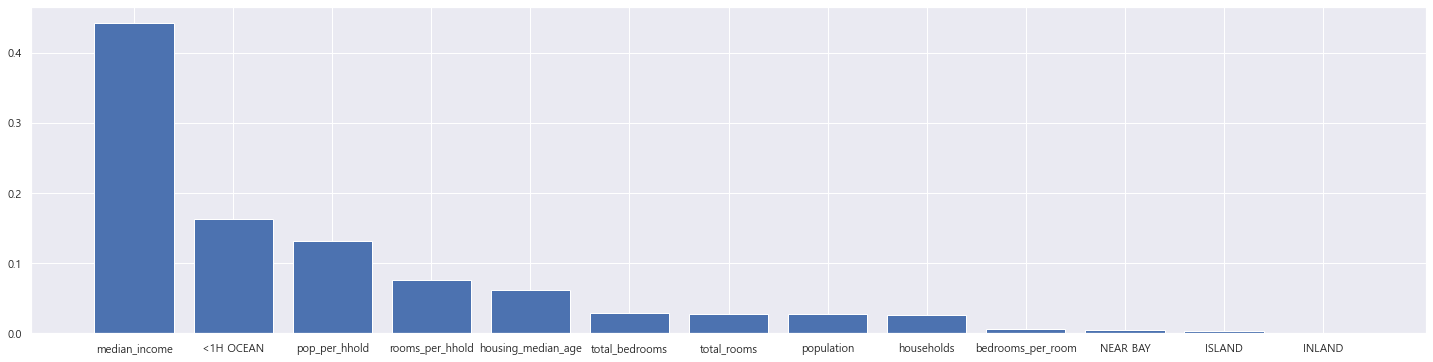

In [63]:
im = dict(sorted(zip(model.feature_importances_, attributes), reverse=True))
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(list(im.values()), list(im.keys()), align='center')

## 6. One-hot coding 선형 회귀 예측
Random effects and fixed effects

,city,year,rent,rent_mean_city
0,Bangaluru,2010,2499,2500
1,Bangaluru,2011,2500,2500
2,Bangaluru,2012,2501,2500
3,Seoul,2010,3499,3500
4,Seoul,2011,3500,3500
5,Seoul,2012,3501,3500
6,Vancouber,2010,3999,4000
7,Vancouber,2011,4000,4000
8,Vancouber,2012,4001,4000


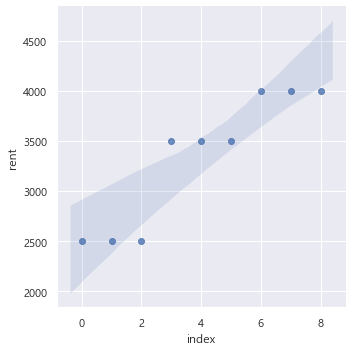

In [64]:
city = ['Bangaluru']*3 + ['Seoul']*3 + ['Vancouber']*3
year = [2010, 2011, 2012]*3
rent =[2499, 2500, 2501, 3499, 3500, 3501, 3999, 4000, 4001]
df = pd.DataFrame(zip(city, year, rent), columns = ['city', 'year', 'rent'])
map_mean = df.groupby(['city'])['rent'].mean().to_dict()
df['rent_mean_city'] = df['city'].map(map_mean)
df
sns.lmplot(x='index', y='rent', data=df.reset_index())

## one_hot encoding

In [65]:
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df['city'] = df['city']

X = one_hot_df[['city_Bangaluru', 'city_Seoul', 'city_Vancouber']]
y = one_hot_df['rent']

LinearRegression()

3333.3333333333335

array([-833.33333333,  166.66666667,  666.66666667])

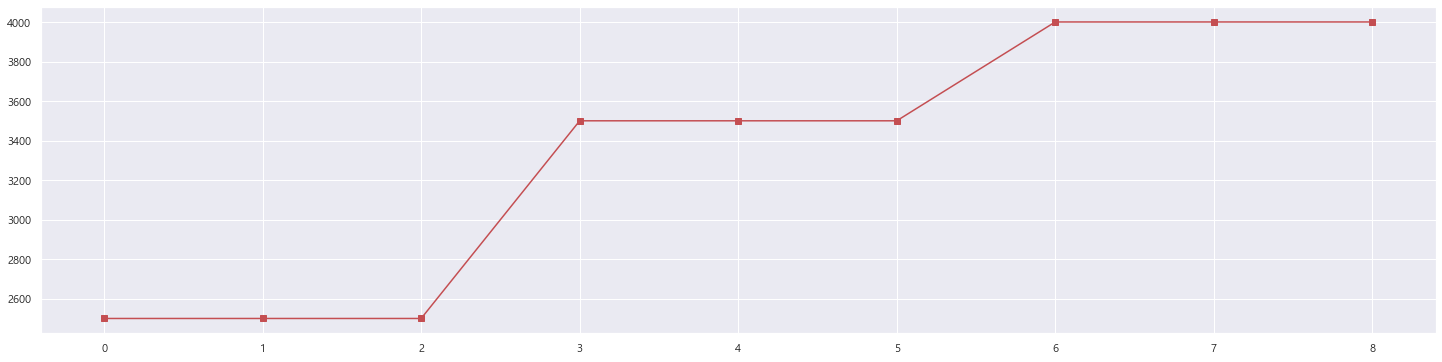

In [66]:
from sklearn import linear_model
model= linear_model.LinearRegression()
model.fit(X, y)
model.intercept_; model.coef_ 
var_predict = X.values@model.coef_.reshape(-1,1)
one_hot_df['predict'] = model.intercept_ + var_predict
plt.plot(one_hot_df.index, one_hot_df['predict'], marker='s', color='r')

In [67]:
df['rent'].mean()
model.intercept_

3333.3333333333335

3333.3333333333335

## dummy

In [68]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df['city'] = df['city']
dummy_df
model.fit(dummy_df.iloc[:, 3:5], dummy_df['rent'])
model.intercept_; model.coef_

,year,rent,rent_mean_city,city_Seoul,city_Vancouber,city
0,2010,2499,2500,0,0,Bangaluru
1,2011,2500,2500,0,0,Bangaluru
2,2012,2501,2500,0,0,Bangaluru
3,2010,3499,3500,1,0,Seoul
4,2011,3500,3500,1,0,Seoul
5,2012,3501,3500,1,0,Seoul
6,2010,3999,4000,0,1,Vancouber
7,2011,4000,4000,0,1,Vancouber
8,2012,4001,4000,0,1,Vancouber


LinearRegression()

2500.0000000000005

array([1000., 1500.])

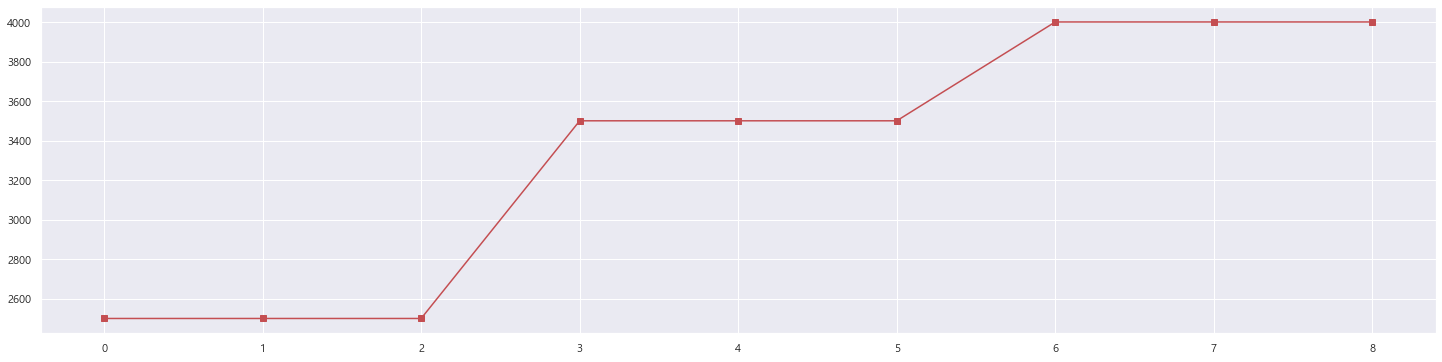

In [69]:
var_predict = dummy_df.iloc[:, 3:5].values@model.coef_.reshape(-1,1)
dummy_df['predict'] = model.intercept_ + var_predict
plt.plot(dummy_df.index, dummy_df['predict'], marker='s', color='r')

In [70]:
model.intercept_
df[df['city'] == 'Bangaluru']['rent'].mean()
df[df['city'] == 'Seoul']['rent'].mean()
df[df['city'] == 'Vancouber']['rent'].mean()

2500.0000000000005

2500.0

3500.0

4000.0

### Effect Coding

In [71]:
effect_df = dummy_df.copy()
effect_df.loc[0:2, ['city_Seoul', 'city_Vancouber']] = -1.0
effect_df
model.fit(effect_df[['city_Seoul', 'city_Vancouber']], effect_df['rent'])
model.intercept_; model.coef_

,year,rent,rent_mean_city,city_Seoul,city_Vancouber,city,predict
0,2010,2499,2500,-1.0,-1.0,Bangaluru,2500.0
1,2011,2500,2500,-1.0,-1.0,Bangaluru,2500.0
2,2012,2501,2500,-1.0,-1.0,Bangaluru,2500.0
3,2010,3499,3500,1.0,0.0,Seoul,3500.0
4,2011,3500,3500,1.0,0.0,Seoul,3500.0
5,2012,3501,3500,1.0,0.0,Seoul,3500.0
6,2010,3999,4000,0.0,1.0,Vancouber,4000.0
7,2011,4000,4000,0.0,1.0,Vancouber,4000.0
8,2012,4001,4000,0.0,1.0,Vancouber,4000.0


LinearRegression()

3333.3333333333335

array([166.66666667, 666.66666667])

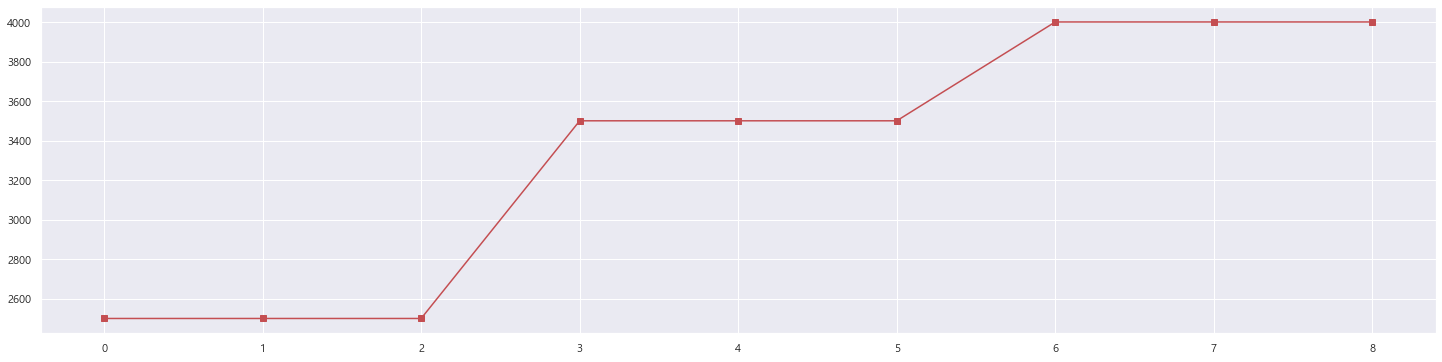

In [72]:
var_predict = effect_df.iloc[:, 3:5].values@model.coef_.reshape(-1,1)
effect_df['predict'] = model.intercept_ + var_predict
plt.plot(effect_df.index, effect_df['predict'], marker='s', color='r')

Variation for dependents and regressors
- overall variation; variation over time and individuals
- between variation; variation between individuals
- within deviation; variation within individuals (over time)

In [73]:
df['overall_mean'] = df['rent'].mean()
df['overall_deviation'] =  df['rent'] - df['overall_mean']
df['between_deviation'] = df['rent_mean_city'] - df['overall_mean']
df['within_deviation'] = df['rent'] - df['rent_mean_city']
df.round(2)

,city,year,rent,rent_mean_city,overall_mean,overall_deviation,between_deviation,within_deviation
0,Bangaluru,2010,2499,2500,3333.33,-834.33,-833.33,-1
1,Bangaluru,2011,2500,2500,3333.33,-833.33,-833.33,0
2,Bangaluru,2012,2501,2500,3333.33,-832.33,-833.33,1
3,Seoul,2010,3499,3500,3333.33,165.67,166.67,-1
4,Seoul,2011,3500,3500,3333.33,166.67,166.67,0
5,Seoul,2012,3501,3500,3333.33,167.67,166.67,1
6,Vancouber,2010,3999,4000,3333.33,665.67,666.67,-1
7,Vancouber,2011,4000,4000,3333.33,666.67,666.67,0
8,Vancouber,2012,4001,4000,3333.33,667.67,666.67,1


## 7. Sweetviz

In [74]:
import sweetviz
titanic = sns.load_dataset('titanic')
for col in titanic.select_dtypes(include=['category']).columns :
    titanic[col] = titanic[col].astype('object')
train, test = train_test_split(titanic, test_size = 0.2, random_state = 11)

In [75]:
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['who', 'adult_male', 'alive', 'alone'], axis = 1)
for col in titanic.select_dtypes(include=['category']).columns :
    titanic[col] = titanic[col].astype('object')
train, test = train_test_split(titanic, test_size = 0.2, random_state = 11)

In [76]:
my_report = sweetviz.compare([train, 'Train'], [test, 'Test'], 'survived')
my_report.show_html('../output/Report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [77]:
feature_config = sweetviz.FeatureConfig(skip=['deck'], force_cat=['sex'])
my_report = sweetviz.compare([train, 'Train'], [test, 'Test'], 'survived',
                             feature_config)
my_report.show_html('../output/Report_01.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [78]:
train.sex.value_counts()
train.sex.value_counts(normalize=True)*100
train[train.sex == 'female']['survived'].value_counts(normalize=True)*100

male      459
female    253
Name: sex, dtype: int64

male      64.466292
female    35.533708
Name: sex, dtype: float64

1    73.913043
0    26.086957
Name: survived, dtype: float64

In [79]:
my_report = sweetviz.compare_intra(train, train['sex'] == 'male', ['Male', 'Female'], 
                                   'survived')
my_report.show_html('../output/Report_02.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


## 8. PyCaret

In [80]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [81]:
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,5740
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [82]:
compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:59
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7580,0.8070,0.5406,0.7061,0.6070,0.4374,0.4489,0.0308
1,K Neighbors Classifier,0.7132,0.7452,0.5351,0.6033,0.5602,0.3509,0.3563,0.0031


FloatingPointError: underflow encountered in exp

In [ ]:
lr = create_model('lr')

In [ ]:
tunes_lr = tune_model(lr)
tunes_lr

In [ ]:
evaluate_model(lr)

In [ ]:
pred_holdout = predict_model(lr)
pred_holdout.shape
pred_holdout.iloc[:, 20:27]

In [ ]:
final_lr = finalize_model(lr)
final_lr 

In [83]:
df = pd.read_pickle('../data/4장자료_01.pkl')
df.rename(columns={'성별':'sex', '연령':'age', '지역':'region', 
                   '직업':'job', '가구소득':'income', '학력':'school', 
                   '주거형태':'house', '결혼':'marriage', '자녀수':'kids',
                   '인터넷평일':'iw', '인터넷주말':'is', '인터넷휴일':'ih',
                   '모바일평일':'mw', '모바일주말':'ms', '모바일휴일':'mh'
                  }, inplace =True)
df.head()

,sex,age,region,job,income,school,house,marriage,kids,iw,is,ih,mw,ms,mh,연령대,drama1,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9,drama10,drama11,drama12,drama13,drama14,drama15,drama16,tv1,tv2,tv3,tv4,tv5,tv6,tv7,tv8,tv9,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,120.000000,120.000000,180.0,12.247449,13.416408,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,40.000000,40.000000,30.0,6.324555,6.324555,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,60.000000,60.000000,120.0,13.416408,13.416408,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,73.094149,69.866846,60.0,7.745967,7.745967,1,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,60.000000,60.000000,180.0,13.416408,13.416408,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [84]:
categorical_list = list(df.select_dtypes(include=['category']).columns)
df = pd.get_dummies(df, prefix= categorical_list)
clf = setup(data = df, target = '구매', normalize = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,2665
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3997, 86)"
4,Missing Values,False
5,Numeric Features,54
6,Categorical Features,31
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [85]:
compare_models()

IntProgress(value=0, description='Processing: ', max=176)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:59
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.6764,0.6834,0.3192,0.5598,0.4056,0.2061,0.2217,0.0547
1,K Neighbors Classifier,0.6468,0.6205,0.3512,0.4909,0.4086,0.1665,0.1718,0.0535


FloatingPointError: underflow encountered in exp